<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/Copy_of_CNN_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:

import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras_resnet.models import ResNet50, ResNet101, ResNet152
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
pip install adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.6 MB/s 


In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
pip install keras-resnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=d703dc2b8c2da36e5a18ec3c8d08a820a62c81f444eec9a56ca5f68d0f7b26d9
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet


In [6]:
from keras_resnet.models import ResNet50, ResNet101, ResNet152

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
img_width, img_height = 224, 224

In [12]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [13]:
# importa o modelo ResNet50 e descarta a última camada do classifier.
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [14]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
last_layer = base_model.get_layer('conv5_block3_add')
print(last_layer.output_shape)

(None, 7, 7, 2048)


In [17]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(3, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [19]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
# Baixar as imagens do exame de citologia cervical
!wget -cq https://citologia-cervical.s3-sa-east-1.amazonaws.com/citologia.zip
!unzip -qq citologia.zip

unzip:  cannot find or open citologia.zip, citologia.zip.zip or citologia.zip.ZIP.


In [21]:
train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) # incluído nas dependências

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [22]:
# Paths
train_Path = '/content/drive/MyDrive/New folder (4)/train'
test_Path = '/content/drive/MyDrive/New folder (4)/val'

In [23]:
training_set = train_datagen.flow_from_directory(train_Path,
                                                 target_size = (img_width, img_height),
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

validation_set = validation_datagen.flow_from_directory(test_Path,
                                                        target_size = (img_width, img_height),
                                                        color_mode='rgb',
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle=True)

Found 2456 images belonging to 3 classes.
Found 616 images belonging to 3 classes.


In [25]:
history = model.fit(training_set,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(validation_set),
                    epochs = 20,
                    validation_data = validation_set
                    )


Epoch 1/20
77/77 [==============================] - 1315s 17s/step - loss: 1.7491 - accuracy: 0.6539 - val_loss: 0.4394 - val_accuracy: 0.8458
Epoch 2/20
77/77 [==============================] - 399s 5s/step - loss: 0.8688 - accuracy: 0.7915 - val_loss: 0.3586 - val_accuracy: 0.8555
Epoch 3/20
77/77 [==============================] - 396s 5s/step - loss: 0.5208 - accuracy: 0.8575 - val_loss: 0.3269 - val_accuracy: 0.8734
Epoch 4/20
77/77 [==============================] - 400s 5s/step - loss: 0.4519 - accuracy: 0.8726 - val_loss: 0.2769 - val_accuracy: 0.8929
Epoch 5/20
77/77 [==============================] - 400s 5s/step - loss: 0.3349 - accuracy: 0.8925 - val_loss: 0.2798 - val_accuracy: 0.8750
Epoch 6/20
77/77 [==============================] - 401s 5s/step - loss: 0.2666 - accuracy: 0.9104 - val_loss: 0.2348 - val_accuracy: 0.9058
Epoch 7/20
77/77 [==============================] - 396s 5s/step - loss: 0.2484 - accuracy: 0.9064 - val_loss: 0.2399 - val_accuracy: 0.8766
Epoch 8/20


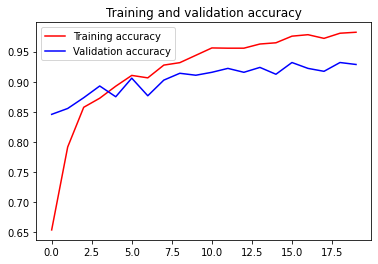

<Figure size 432x288 with 0 Axes>

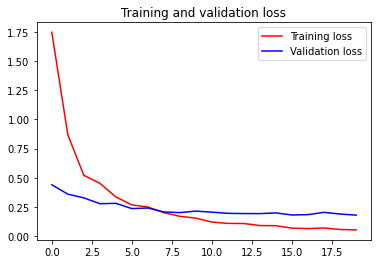

<Figure size 432x288 with 0 Axes>

In [27]:
# Gráfico do histórico do treino
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [28]:
# salvar modelo
model.save("model.h5")
print("Modelo salvo em disco dessa instância do Google Colab")

Modelo salvo em disco dessa instância do Google Colab


In [30]:
# métricas de perda e acurácia
score = model.evaluate_generator(validation_set, 50)

print ("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


loss: 17.86%
accuracy: 92.86%


In [33]:
import pandas as pd
import torch
from torch.utils import data
import numpy as np
from PIL import Image
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [59]:
Class = [ 'Glioma', 'Meningioma', 'Pituitary tumor']

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
import os
import glob
import zipfile
import seaborn as sb
import numpy as np # linear algebra
import pandas as pd # data processing 
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.metrics import confusion_matrix,classification_report


In [45]:
from google.colab import drive


In [37]:
from sklearn.metrics import confusion_matrix

In [ ]:
# carregar modelo salvo no HD
from keras.models import load_model

model = load_model('model.h5')

In [ ]:
model.summary()

In [ ]:
# visualização das camadas
for i, layer in enumerate(model.layers):
   print(i, layer.name)

In [ ]:
for layer in model.layers[:167]:
   layer.trainable = False
for layer in model.layers[167:]:
   layer.trainable = True

In [ ]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.000001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from google.colab import drive
from keras.callbacks import *

drive.mount('/content/drive')
filepath="/content/drive/My Drive/Colab Notebooks/log/resnet50:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# Carregando o modelo com o peso melhor treinado (exemplo: carregando epoch 47, validation accuracy de 90.5%)

model.load_weights('/content/drive/My Drive/Colab Notebooks/log/resnet50:030-val_acc:0.629.hdf5')

In [ ]:
# Fine-tune
history = model.fit_generator(training_set,
                    steps_per_epoch=528/32,
                    epochs = 100,
                    validation_data = validation_set,
                    validation_steps = 105/32,
                    callbacks=callbacks_list)

In [ ]:
model.save("model.h5")
uploaded = drive.CreateFile({'title': 'model.h5'})
uploaded.SetContentFile('model.h5')
uploaded.Upload()

In [ ]:
import matplotlib.pyplot as plt

# listar todos os dados no history
print(history.history.keys())
# Gráfico de treino - acurácia
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Gráfico de treino - perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pip install --upgrade --quiet PyDrive
# para conectar com o Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Importando imagens de teste do drive

link = 'https://drive.google.com/open?id=1sbjcK__NABa7gfsPOt7JM8jAaXCLCfKW'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste1_cytHigh-grade Squamous Intraepithelial Lesion - 14659.jpg')

link = 'https://drive.google.com/open?id=1vDBjgozlaLg0tcGQ50b9wpOBz_NYyx8o'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste2_cyt14721.jpg')

link = 'https://drive.google.com/open?id=14mCco19UM0k83Irdz3xk2lQaOs7a1YuK'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('teste3_cytoCandida - 7557.jpg')

In [ ]:
# Testando o modelo

test_image = image.load_img('teste1_cytHigh-grade Squamous Intraepithelial Lesion - 14659.jpg', target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 0:
    diagnostico = 'Carcinoma'
elif result[0][0] == 1:
    diagnostico = 'Normal'
else:
    diagnostico = 'Outros problemas'
    
print ('Diagnóstico:', diagnostico)

In [ ]:
# Salvando o modelo no drive

uploaded = drive.CreateFile({'title': 'model.h5'})
uploaded.SetContentFile('model.h5')
uploaded.Upload()

In [ ]:
# Importando o modelo do drive

link = 'https://drive.google.com/open?id=1b8QkLS1nix4K5g46SGFAR4Cnx1D6eoF1'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('model.h5')